# Flair Training Sequence Labeling Models

**(C) 2019-2024 by [Damir Cavar](http://damir.cavar.me/)**

**Version:** 0.5, January 2024

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

**Prerequisites:**

In [ ]:
!pip install -U flair

For the Flair tutorial 7 license and copyright restrictions, see the website below. For all the parts that I added, consider the license to be [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)).

Based on the [Flair Tutorial 7 Training a Model](https://github.com/zalandoresearch/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md).

This tutorial is using the CoNLL-03 Named Entity Recognition data set. See [this website](https://www.clips.uantwerpen.be/conll2003/ner/) for more details and to download an independent copy of the data set.

## Training a Sequence Labeling Model

We will need the following modules:

In [1]:
from flair.data import Corpus
from flair.datasets import WNUT_17
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

If you want to use the CoNLL-03 corpus, you need to download it and unpack it in your Flair data and model folder. This folder should be in your home-directory and it is named *.flair*. Once you have downloaded the corpus, unpack it into a folder *.flair/datasets/conll_03*. If you do not want to use the CoNLL-03 corpus, but rather [the free W-NUT 17 corpus](https://noisy-text.github.io/2017/emerging-rare-entities.html), you can use the Flair command: *WNUT_17()*

If you decide to download the CoNLL-03 corpus, adapt the following code. We load the W-NUT17 corpus and down-sample it to 10% of its size:

In [2]:
corpus: Corpus = WNUT_17().downsample(0.1)
print(corpus)

2021-02-01 18:04:33,491 Reading data from /home/damir/.flair/datasets/wnut_17
2021-02-01 18:04:33,492 Train: /home/damir/.flair/datasets/wnut_17/wnut17train.conll
2021-02-01 18:04:33,492 Dev: /home/damir/.flair/datasets/wnut_17/emerging.dev.conll
2021-02-01 18:04:33,492 Test: /home/damir/.flair/datasets/wnut_17/emerging.test.annotated
Corpus: 339 train + 101 dev + 129 test sentences


Declare the tag type to be predicted:

In [3]:
tag_type = 'ner'

Create the tag-dictionary for the tag-type:

In [4]:
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 28 tags: <unk>, O, S-group, B-person, E-person, B-location, E-location, S-location, S-person, S-product, B-creative-work, E-creative-work, I-creative-work, B-product, E-product, S-corporation, I-location, B-corporation, E-corporation, I-product, B-group, I-group, E-group, S-creative-work, I-corporation, I-person, <START>, <STOP>


Load the embeddings:

In [5]:
embedding_types: List[TokenEmbeddings] = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'),
    # FlairEmbeddings('news-backward'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

Load and initialize the sequence tagger:

In [6]:
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

Load and initialize the trainer:

In [7]:
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

If you have a GPU (otherwise maybe tweak the batch size, etc.), run the training with 150 epochs:

In [8]:
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

2021-02-01 18:05:50,401 ----------------------------------------------------------------------------------------------------
2021-02-01 18:05:50,402 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=28, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-02-01 18:05:50,402 ----------------------------------------------------------------------------------------------------
2021-02-01 18:05:50,402 Corpus: "Corpus: 339 train + 101 dev + 129 test sentences"
2021-02-01 18:05:50,403 ----------------------------------------------------------------------------------------------------
2021-02-01 18:05:50,403 Parameters:
2021-02-01 18:05:50,403  - learning_r

2021-02-01 18:06:01,848 epoch 5 - iter 1/11 - loss 6.65889263 - samples/sec: 373.09 - lr: 0.100000
2021-02-01 18:06:01,938 epoch 5 - iter 2/11 - loss 7.88906908 - samples/sec: 361.66 - lr: 0.100000
2021-02-01 18:06:02,002 epoch 5 - iter 3/11 - loss 6.64224911 - samples/sec: 504.10 - lr: 0.100000
2021-02-01 18:06:02,102 epoch 5 - iter 4/11 - loss 7.85007381 - samples/sec: 320.26 - lr: 0.100000
2021-02-01 18:06:02,171 epoch 5 - iter 5/11 - loss 7.38627882 - samples/sec: 471.58 - lr: 0.100000
2021-02-01 18:06:02,261 epoch 5 - iter 6/11 - loss 6.77470183 - samples/sec: 359.84 - lr: 0.100000
2021-02-01 18:06:02,332 epoch 5 - iter 7/11 - loss 6.48107277 - samples/sec: 451.85 - lr: 0.100000
2021-02-01 18:06:02,412 epoch 5 - iter 8/11 - loss 6.62623453 - samples/sec: 403.21 - lr: 0.100000
2021-02-01 18:06:02,484 epoch 5 - iter 9/11 - loss 6.49157514 - samples/sec: 444.73 - lr: 0.100000
2021-02-01 18:06:02,577 epoch 5 - iter 10/11 - loss 6.40068092 - samples/sec: 347.91 - lr: 0.100000
2021-02-0

2021-02-01 18:06:12,583 epoch 10 - iter 7/11 - loss 5.86382076 - samples/sec: 334.96 - lr: 0.100000
2021-02-01 18:06:12,655 epoch 10 - iter 8/11 - loss 5.48114887 - samples/sec: 446.11 - lr: 0.100000
2021-02-01 18:06:12,741 epoch 10 - iter 9/11 - loss 5.47936522 - samples/sec: 375.85 - lr: 0.100000
2021-02-01 18:06:12,807 epoch 10 - iter 10/11 - loss 5.56313055 - samples/sec: 489.47 - lr: 0.100000
2021-02-01 18:06:12,867 epoch 10 - iter 11/11 - loss 5.51910056 - samples/sec: 535.70 - lr: 0.100000
2021-02-01 18:06:12,868 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:12,868 EPOCH 10 done: loss 5.5191 - lr 0.1000000
2021-02-01 18:06:12,993 DEV : loss 6.030636787414551 - score 0.0
2021-02-01 18:06:12,996 BAD EPOCHS (no improvement): 1
2021-02-01 18:06:12,996 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:13,059 epoch 11 - iter 1/11 - loss 6.45456409

2021-02-01 18:06:19,646 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:19,646 EPOCH 15 done: loss 5.3121 - lr 0.0500000
2021-02-01 18:06:19,759 DEV : loss 5.300390243530273 - score 0.0
2021-02-01 18:06:19,762 BAD EPOCHS (no improvement): 1
2021-02-01 18:06:19,763 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:19,827 epoch 16 - iter 1/11 - loss 3.42073154 - samples/sec: 506.24 - lr: 0.050000
2021-02-01 18:06:19,920 epoch 16 - iter 2/11 - loss 3.89306760 - samples/sec: 344.10 - lr: 0.050000
2021-02-01 18:06:19,986 epoch 16 - iter 3/11 - loss 4.07538271 - samples/sec: 494.82 - lr: 0.050000
2021-02-01 18:06:20,076 epoch 16 - iter 4/11 - loss 4.41863441 - samples/sec: 357.39 - lr: 0.050000
2021-02-01 18:06:20,146 epoch 16 - iter 5/11 - loss 3.99061079 - samples/sec: 457.10 - lr: 0.050000
2021-02-01 18:06:20,239 epoch 16 - iter 6/11 - loss 4.56745275 -

2021-02-01 18:06:24,936 epoch 21 - iter 2/11 - loss 5.59622884 - samples/sec: 336.20 - lr: 0.025000
2021-02-01 18:06:25,008 epoch 21 - iter 3/11 - loss 5.84343863 - samples/sec: 450.53 - lr: 0.025000
2021-02-01 18:06:25,098 epoch 21 - iter 4/11 - loss 5.62469876 - samples/sec: 356.94 - lr: 0.025000
2021-02-01 18:06:25,174 epoch 21 - iter 5/11 - loss 4.91339703 - samples/sec: 423.06 - lr: 0.025000
2021-02-01 18:06:25,252 epoch 21 - iter 6/11 - loss 4.73817114 - samples/sec: 411.22 - lr: 0.025000
2021-02-01 18:06:25,368 epoch 21 - iter 7/11 - loss 4.99063182 - samples/sec: 278.31 - lr: 0.025000
2021-02-01 18:06:25,447 epoch 21 - iter 8/11 - loss 4.78317773 - samples/sec: 409.48 - lr: 0.025000
2021-02-01 18:06:25,531 epoch 21 - iter 9/11 - loss 4.93310282 - samples/sec: 383.46 - lr: 0.025000
2021-02-01 18:06:25,604 epoch 21 - iter 10/11 - loss 4.86535425 - samples/sec: 447.40 - lr: 0.025000
2021-02-01 18:06:25,669 epoch 21 - iter 11/11 - loss 5.00299033 - samples/sec: 500.36 - lr: 0.02500

2021-02-01 18:06:30,750 epoch 26 - iter 7/11 - loss 5.11176218 - samples/sec: 467.54 - lr: 0.012500
2021-02-01 18:06:30,838 epoch 26 - iter 8/11 - loss 4.99181771 - samples/sec: 365.73 - lr: 0.012500
2021-02-01 18:06:30,913 epoch 26 - iter 9/11 - loss 4.88474549 - samples/sec: 435.82 - lr: 0.012500
2021-02-01 18:06:31,009 epoch 26 - iter 10/11 - loss 4.84586434 - samples/sec: 336.19 - lr: 0.012500
2021-02-01 18:06:31,065 epoch 26 - iter 11/11 - loss 4.77726290 - samples/sec: 577.03 - lr: 0.012500
2021-02-01 18:06:31,066 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:31,066 EPOCH 26 done: loss 4.7773 - lr 0.0125000
2021-02-01 18:06:31,182 DEV : loss 5.267317771911621 - score 0.0
Epoch    26: reducing learning rate of group 0 to 6.2500e-03.
2021-02-01 18:06:31,184 BAD EPOCHS (no improvement): 4
2021-02-01 18:06:31,185 ----------------------------------------------------------------------------------------------------


2021-02-01 18:06:36,116 epoch 31 - iter 11/11 - loss 4.82171939 - samples/sec: 492.49 - lr: 0.003125
2021-02-01 18:06:36,117 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:36,117 EPOCH 31 done: loss 4.8217 - lr 0.0031250
2021-02-01 18:06:36,253 DEV : loss 5.200736999511719 - score 0.0
2021-02-01 18:06:36,255 BAD EPOCHS (no improvement): 1
2021-02-01 18:06:36,256 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:36,324 epoch 32 - iter 1/11 - loss 5.55411530 - samples/sec: 474.71 - lr: 0.003125
2021-02-01 18:06:36,409 epoch 32 - iter 2/11 - loss 4.37369609 - samples/sec: 379.89 - lr: 0.003125
2021-02-01 18:06:36,480 epoch 32 - iter 3/11 - loss 3.85853926 - samples/sec: 454.19 - lr: 0.003125
2021-02-01 18:06:36,574 epoch 32 - iter 4/11 - loss 4.36530757 - samples/sec: 345.68 - lr: 0.003125
2021-02-01 18:06:36,641 epoch 32 - iter 5/11 - loss 4.74659357 

2021-02-01 18:06:41,292 epoch 37 - iter 1/11 - loss 4.28866768 - samples/sec: 346.74 - lr: 0.001563
2021-02-01 18:06:41,367 epoch 37 - iter 2/11 - loss 4.08108044 - samples/sec: 429.55 - lr: 0.001563
2021-02-01 18:06:41,449 epoch 37 - iter 3/11 - loss 4.60505168 - samples/sec: 392.26 - lr: 0.001563
2021-02-01 18:06:41,538 epoch 37 - iter 4/11 - loss 4.61721265 - samples/sec: 361.44 - lr: 0.001563
2021-02-01 18:06:41,629 epoch 37 - iter 5/11 - loss 5.10927172 - samples/sec: 356.81 - lr: 0.001563
2021-02-01 18:06:41,725 epoch 37 - iter 6/11 - loss 5.17783483 - samples/sec: 336.22 - lr: 0.001563
2021-02-01 18:06:41,792 epoch 37 - iter 7/11 - loss 5.30931255 - samples/sec: 487.99 - lr: 0.001563
2021-02-01 18:06:41,883 epoch 37 - iter 8/11 - loss 5.27347386 - samples/sec: 354.29 - lr: 0.001563
2021-02-01 18:06:41,959 epoch 37 - iter 9/11 - loss 4.94251633 - samples/sec: 427.22 - lr: 0.001563
2021-02-01 18:06:42,053 epoch 37 - iter 10/11 - loss 4.73549995 - samples/sec: 342.35 - lr: 0.001563

{'test_score': 0.0,
 'dev_score_history': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'train_loss_history': [13.374773198908025,
  6.851050333543257,
  6.573457501151345,
  6.462399742820046,
  6.360361229289662,
  6.08707822452892,
  5.83295598897067,
  5.8677706284956495,
  5.807065053419634,
  5.5191005576740615,
  5.500911495902321,
  5.3716865019364795,
  5.350133180618286,
  5.3694119886918505,
  5.312076070091941,
  5.2530389265580615,
  5.130628369071267,
  4.9549102999947285,
  4.859073985706676,
  4.946430054577914,
  5.002990332516757,
  4.951430754228071,
  4.760910576040095,
  4.88827226378701,
  4.903254812413996,
  4.7772629044272685,
  4.8628104816783555,
  4.829918189482256,
  4.810785640369762,
  4.677290482954546,
  4.821719386360862,
  4.802886681

Plot the training curves and results:

2021-02-01 18:06:48,552 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:48,552 WARNING: No LOSS found for test split in this data.
2021-02-01 18:06:48,553 Are you sure you want to plot LOSS and not another value?
2021-02-01 18:06:48,553 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:48,563 ----------------------------------------------------------------------------------------------------
2021-02-01 18:06:48,564 WARNING: No F1 found for test split in this data.
2021-02-01 18:06:48,564 Are you sure you want to plot F1 and not another value?
2021-02-01 18:06:48,564 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in resources/taggers/example-ner/training.png


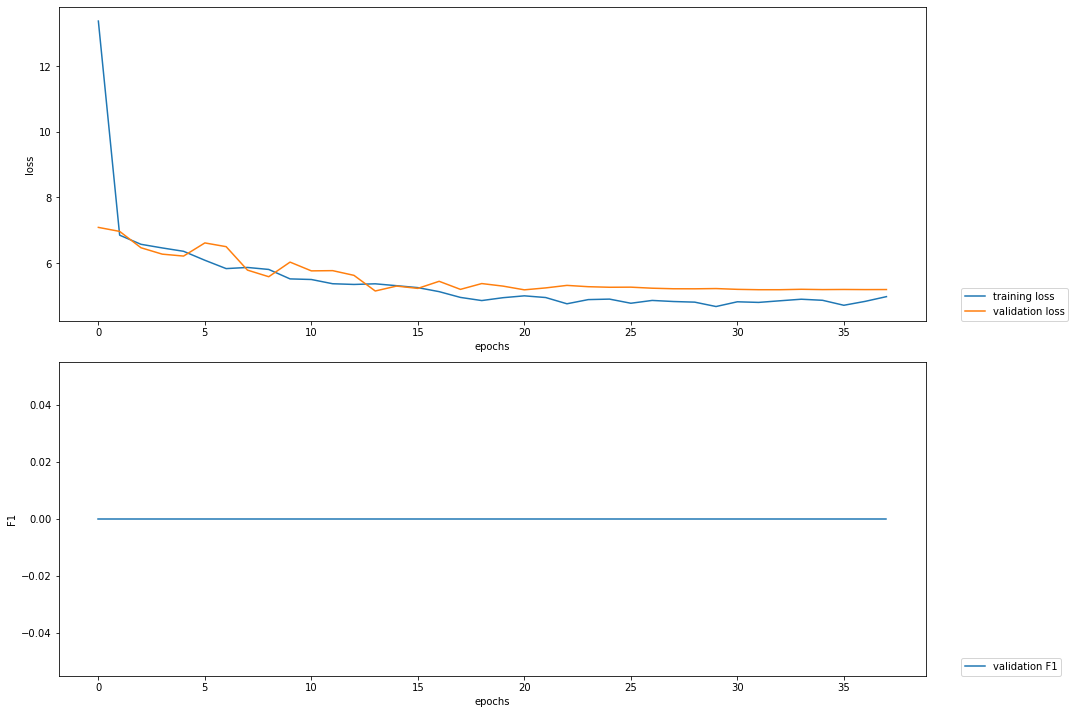

Weights plots are saved in resources/taggers/example-ner/weights.png


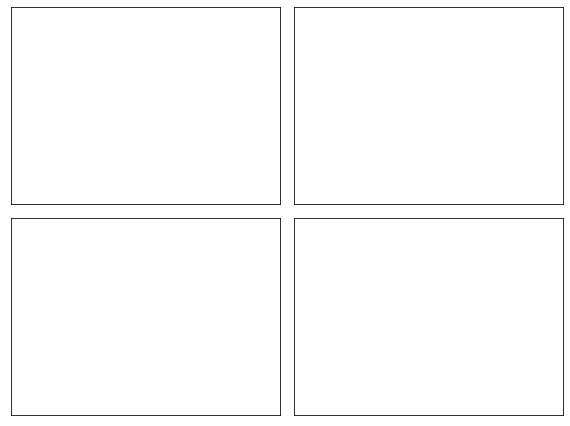

In [9]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('resources/taggers/example-ner/loss.tsv')
plotter.plot_weights('resources/taggers/example-ner/weights.txt')

Use the model via the *predict* method:

In [25]:
from flair.data import Sentence
model = SequenceTagger.load('resources/taggers/example-ner/final-model.pt')
sentence = Sentence('John lives in the Empire State Building .')
model.predict(sentence)
print(sentence.to_tagged_string())

2020-02-03 09:08:37,099 loading file resources/taggers/example-ner/final-model.pt
John lives in the Empire State Building .
